# Homework week 1 - data preprocessing

In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

#### We need to change the column names to match tasks given names

In [31]:
X = X.copy()

X.rename(columns={
    'bp': 'blood pressure',
    'sg': 'specific gravity',
    'al': 'albumin',
    'su': 'sugar',
    'bgr': 'blood glucose random',
    'bu': 'blood urea',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed cell volume',
    'wbcc': 'white blood cell count',
    'rbcc': 'red blood cell count'
}, inplace=True)

#### Now lets drop the unwanted columns

In [32]:
X.drop(columns=['pc', 'pcc', 'ba', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'rbc'], inplace=True)

#### Let's check the results

In [33]:
X

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9


#### Now lets change hemoglobin from g/dl to g/l

In [34]:
X["hemoglobin"] = X["hemoglobin"].apply(lambda x: x/10)

#### Let's check if the change was successful

In [35]:
X["hemoglobin"]

0      1.54
1      1.13
2      0.96
3      1.12
4      1.16
       ... 
395    1.57
396    1.65
397    1.58
398    1.42
399    1.58
Name: hemoglobin, Length: 400, dtype: float64

### Next we need to setup the class column to be recorded as affected or control instead of ckd or notckd

#### Let's check the unique values in the class column

In [36]:
y = y.copy()
y["class"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

#### We can see that the class column has some trailing whitespaces, we need to strip them first before we can change the values

#### Let's check the data types of the class column

In [37]:
y.dtypes

class    object
dtype: object

#### We can see that the class column is of type object, we need to change it to string

In [38]:
y["class"] = y["class"].astype(str)
# strip trailing whitespaces
y["class"] = y["class"].str.strip()

#### Let's check the unique values in the class column after stripping the whitespaces

In [39]:
y["class"].unique()

array(['ckd', 'notckd'], dtype=object)

#### Now we can change the values in the class column

In [40]:
y["class"] = ["affected" if x == "ckd" else "control" for x in y["class"]]

#### Let's check the unique values in the class column after changing the values

In [41]:
y["class"].unique()

array(['affected', 'control'], dtype=object)

#### Now we can join the class column to the X table

In [42]:
# join class to X 
X["class"] = y["class"]

#### Now we need to check for missing values and remove the columns 3 or more missing values

In [43]:
max_nan = 3
threshold = len(X.columns) - max_nan

#### Let's drop the columns with 3 or more missing values

In [44]:
X = X.dropna(thresh=threshold)

#### Let's check the results

In [45]:
# show meta data
X.describe(include='all')

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
count,295.000000,293.000000,286.000000,286.000000,286.000000,284.000000,292.000000,265.000000,265.000000,293.000000,290.000000,274.000000,260.000000,298
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affected
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154
mean,51.345763,76.075085,1.018112,0.926573,0.416084,144.598592,55.253767,138.166038,4.519245,1.282287,39.389655,8349.635036,4.721538,NaN
std,16.331466,13.772410,0.005706,1.352656,1.062083,78.045249,47.292263,7.244824,2.721903,0.290645,9.000378,2942.454785,1.025466,NaN
min,4.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000,9.000000,2200.000000,2.100000,NaN
25%,41.500000,70.000000,1.015000,0.000000,0.000000,99.000000,27.000000,135.000000,3.800000,1.090000,33.000000,6500.000000,3.975000,NaN
50%,54.000000,80.000000,1.020000,0.000000,0.000000,119.000000,41.000000,139.000000,4.400000,1.330000,41.000000,7950.000000,4.800000,NaN
75%,63.000000,80.000000,1.025000,2.000000,0.000000,151.500000,58.000000,142.000000,4.900000,1.500000,46.000000,9800.000000,5.425000,NaN


#### As we can see, the drop was successful

#### Now let's split the data into affected and control for further analysis

In [46]:
# split affected and control to 2 different tables
affected = X[X["class"] == "affected"]
control = X[X["class"] == "control"]

#### Now let's check the results

##### Affected

In [47]:
affected.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,151.000000,151.000000,146.000000,146.000000,146.000000,144.000000,152.000000,124.000000,124.000000,152.000000,147.000000,134.000000,120.000000
mean,55.874172,80.596026,1.013938,1.815068,0.815068,180.597222,75.823026,134.096774,4.733871,1.063487,32.666667,9052.238806,3.945000
std,15.580888,16.051242,0.004705,1.404443,1.374664,95.243620,57.477853,7.421589,3.926497,0.219238,7.175236,3641.732142,0.863922
min,4.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000,9.000000,2200.000000,2.100000
25%,48.000000,70.000000,1.010000,0.250000,0.000000,107.000000,36.000000,132.000000,3.900000,0.950000,29.000000,6825.000000,3.400000
50%,59.000000,80.000000,1.015000,2.000000,0.000000,149.000000,55.500000,136.000000,4.300000,1.090000,33.000000,8900.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,239.500000,98.000000,139.000000,4.900000,1.200000,37.000000,10500.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,147.000000,47.000000,1.610000,52.000000,26400.000000,8.000000


##### Control

In [48]:
control.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,144.000000,142.000000,140.000000,140.0,140.0,140.000000,140.000000,141.000000,141.000000,141.000000,143.000000,140.000000,140.000000
mean,46.597222,71.267606,1.022464,0.0,0.0,107.571429,32.921429,141.744681,4.330496,1.518156,46.300699,7677.142857,5.387143
std,15.790729,8.576659,0.002509,0.0,0.0,18.586041,11.330908,4.797923,0.590634,0.127826,4.128286,1839.429958,0.594682
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,1.300000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,24.000000,138.000000,3.700000,1.410000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.500000,33.000000,141.000000,4.500000,1.500000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.250000,44.000000,146.000000,4.900000,1.610000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,1.780000,54.000000,11000.000000,6.500000


#### Now let's import the necessary libraries for plotting

In [49]:
import matplotlib.pyplot as plt
import math

#### Let's define a function to plot the data

In [50]:
def plot_data(df):
    num_cols = len(affected.select_dtypes(include=['float64', 'int64']).columns)
    num_rows = math.ceil(num_cols / 3)
    
    plt.figure(figsize=(20, 10))
    
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        plt.subplot(num_rows, 3, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
        
        plt.subplots_adjust(hspace=0.75, wspace=0.5)

#### Let's plot the affected data

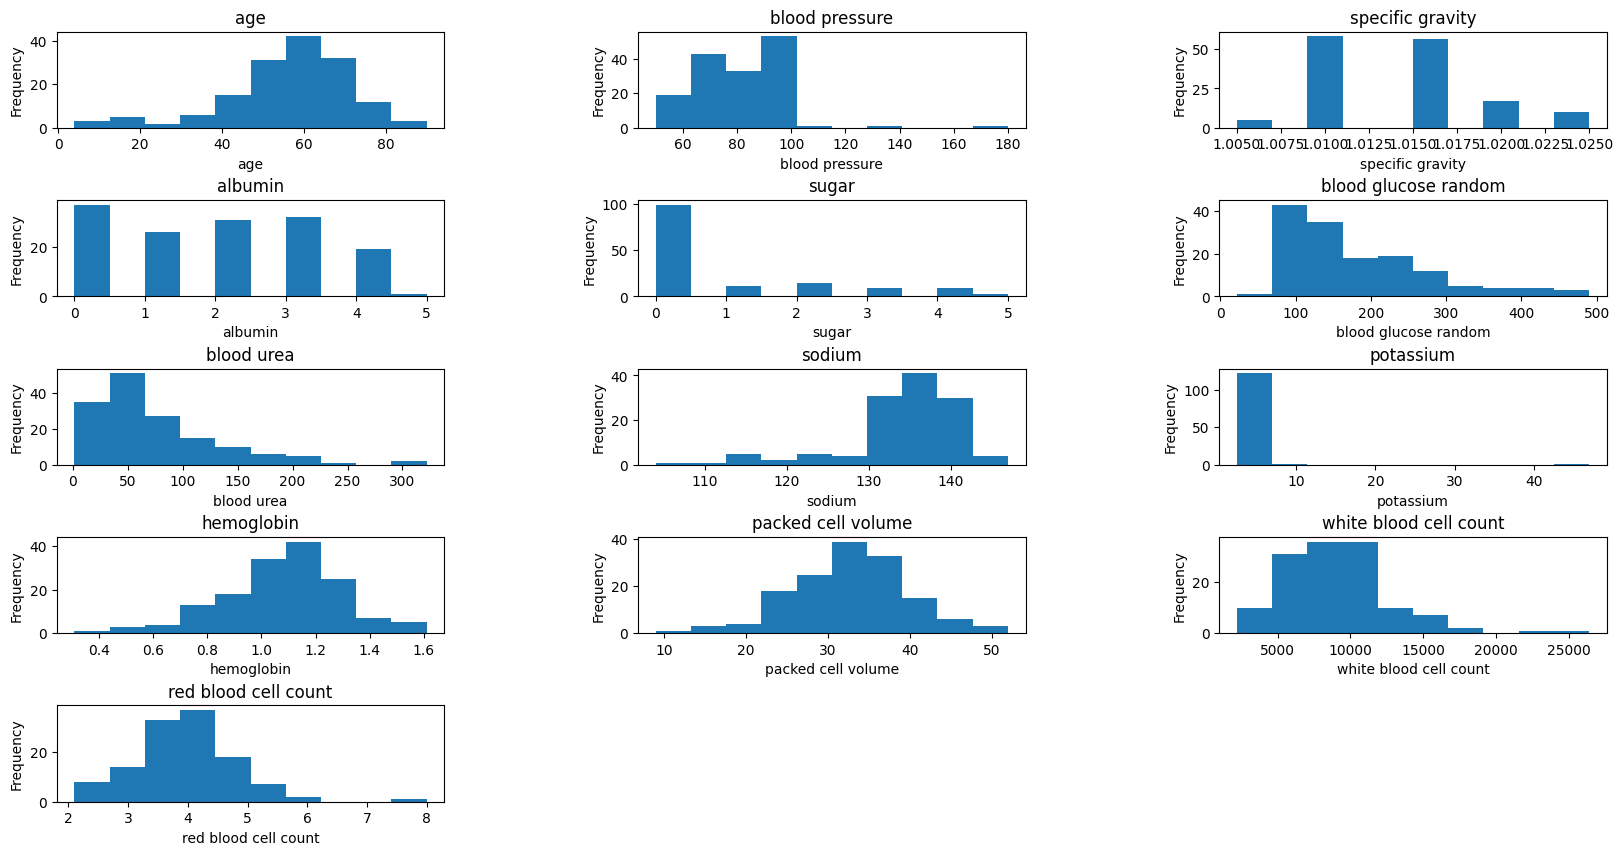

In [51]:
plot_data(affected)

#### And plot the control data

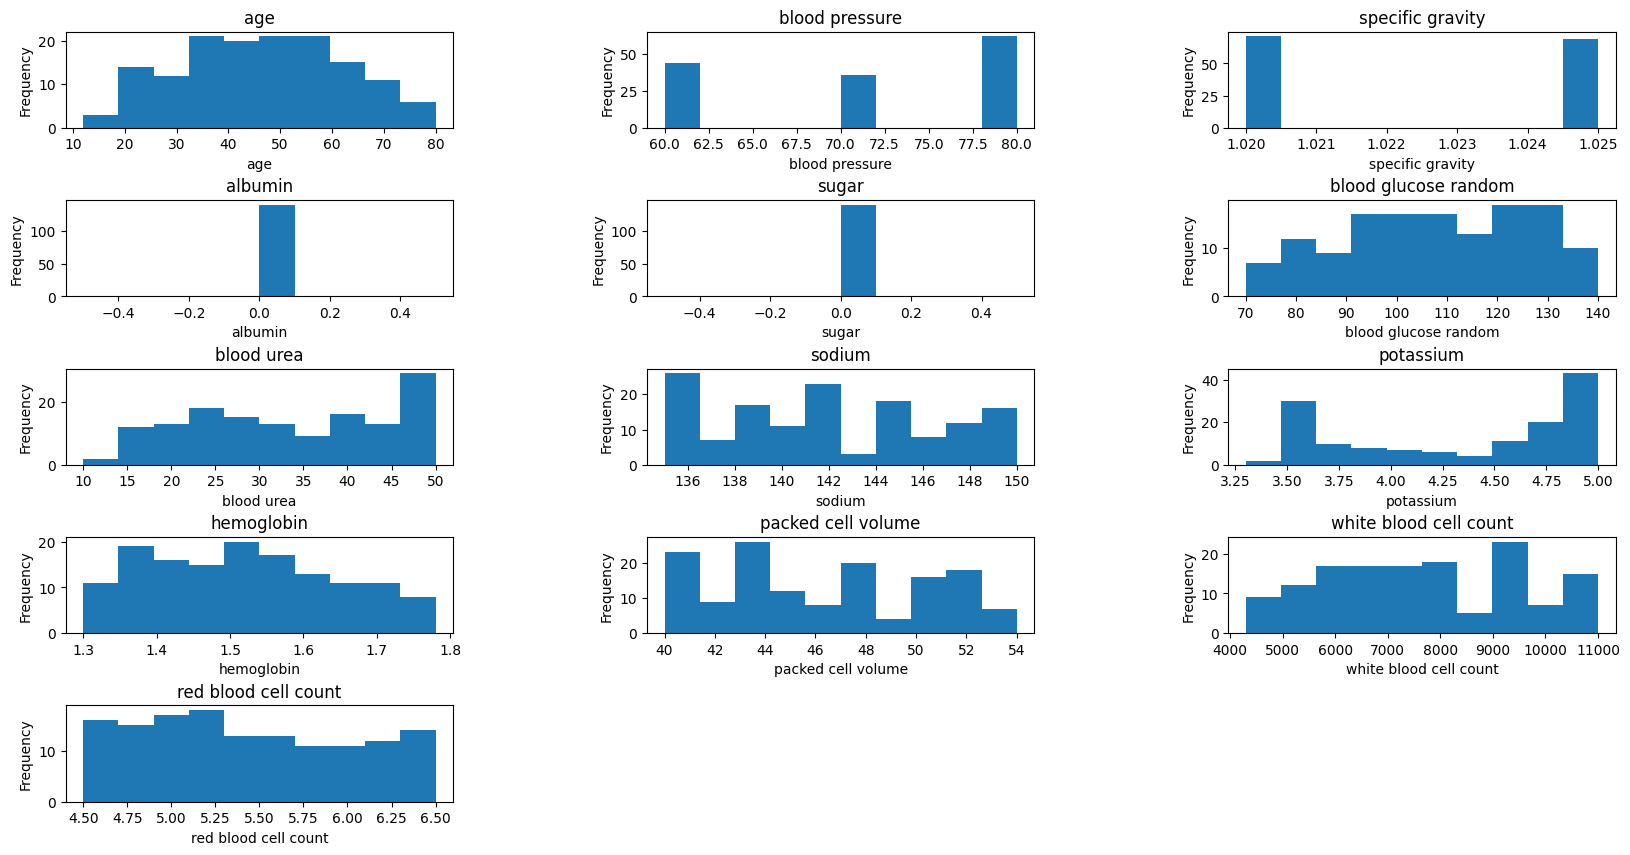

In [52]:
plot_data(control)

#### As we can see, columns like sugar and albumin are not normally distributed, we could try to normalize the data by using a log transformation
* This would be done by checking the proper values for each column and filtering out the possible bad values

#### Let's prepare for correlation chart by dropping the class column since it contains string values

In [53]:
corr = X.drop(columns=["class"]).corr()

In [55]:
corr

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.100634,-0.251679,0.201451,0.212137,0.267729,0.187079,-0.131422,0.010874,-0.222649,-0.244937,0.160233,-0.274686
blood pressure,0.100634,1.000000,-0.245718,0.215153,0.261735,0.180396,0.204020,-0.139379,0.076709,-0.327376,-0.348623,0.025079,-0.261540
specific gravity,-0.251679,-0.245718,1.000000,-0.526067,-0.306083,-0.400945,-0.377310,0.461567,-0.027837,0.622377,0.619769,-0.214070,0.585598
albumin,0.201451,0.215153,-0.526067,1.000000,0.355944,0.396205,0.574415,-0.476330,0.171647,-0.675344,-0.643667,0.227213,-0.575793
sugar,0.212137,0.261735,-0.306083,0.355944,1.000000,0.757453,0.126681,-0.189063,0.166932,-0.220881,-0.226852,0.177259,-0.237342
blood glucose random,0.267729,0.180396,-0.400945,0.396205,0.757453,1.000000,0.177782,-0.307817,0.056732,-0.313280,-0.311766,0.146560,-0.282794
blood urea,0.187079,0.204020,-0.377310,0.574415,0.126681,0.177782,1.000000,-0.450279,0.200253,-0.634904,-0.624874,0.062414,-0.566394
sodium,-0.131422,-0.139379,0.461567,-0.476330,-0.189063,-0.307817,-0.450279,1.000000,-0.034834,0.513195,0.525183,-0.070558,0.451828
potassium,0.010874,0.076709,-0.027837,0.171647,0.166932,0.056732,0.200253,-0.034834,1.000000,-0.140322,-0.167459,-0.105921,-0.158933
hemoglobin,-0.222649,-0.327376,0.622377,-0.675344,-0.220881,-0.313280,-0.634904,0.513195,-0.140322,1.000000,0.887958,-0.197647,0.795192


#### Let's prepare the figure for the correlation chart

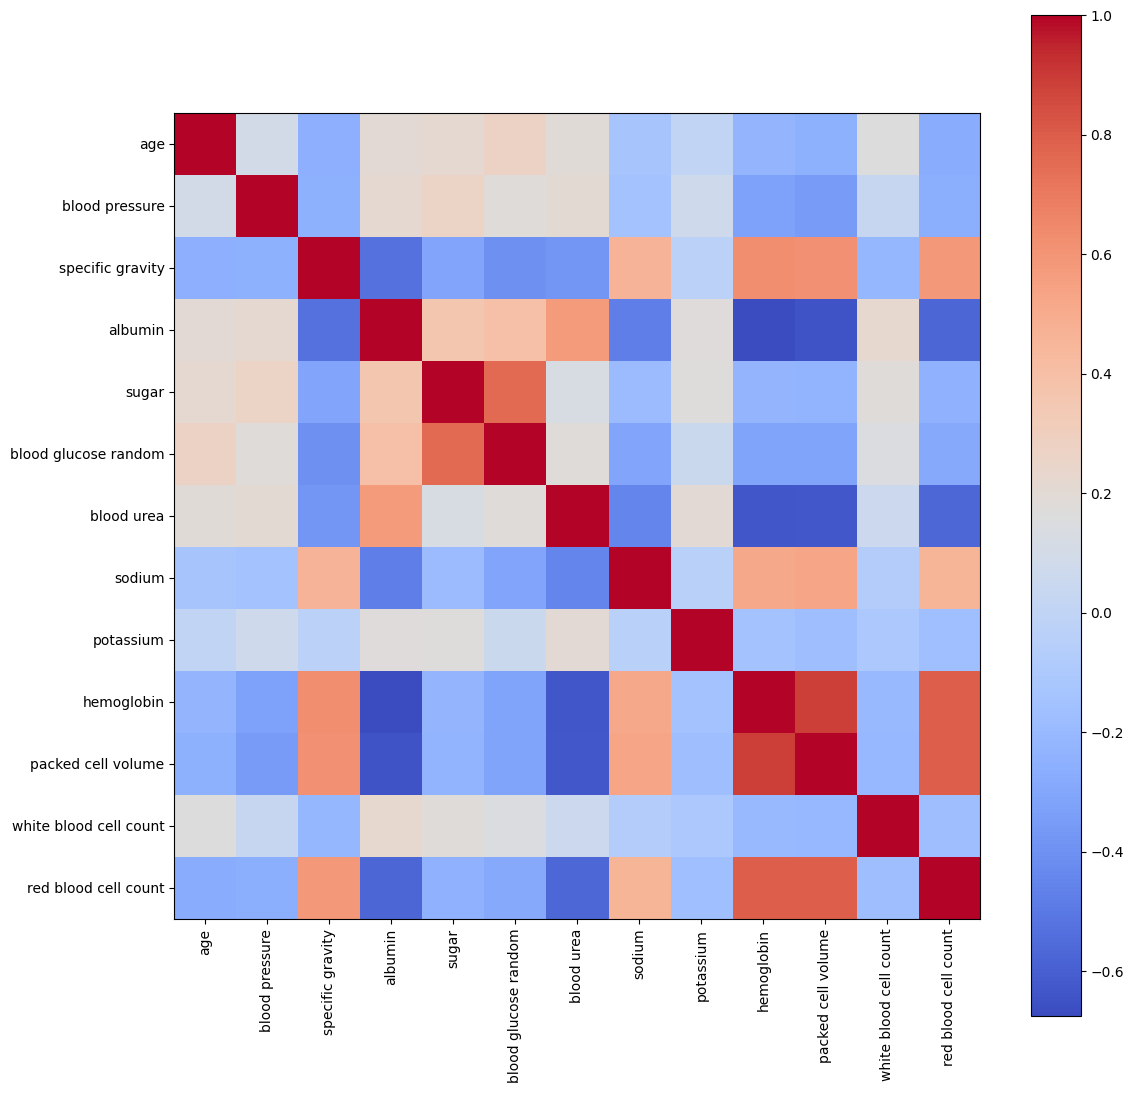

In [61]:
plt.figure(figsize=(13, 13))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.grid(False)

#### Our correlation chart is ready.
* As we can see, the closer we are to 1, the stronger the correlation, like with hemoglobin and packed cell volume.
* The closer we are to -1, the stronger the negative correlation, like with albumin and hemoglobin.

 
*Dislaimer!*

*We can only interpret the data, and not give any healthcare advice since we are not healthcare professionals.*